### With the same subset of the LendingClub DataSet obtained from Kaggle (clean and featured from the NN excercise) we try  to predict if the borrower will pay the loan but now using logistic regression

**First we import pandas, numpy ans seaborn**

In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns

**We read the file 'loans_clean.csv'in a data frame using pandas**

In [2]:
data=pd.read_csv('data/loans_clean.csv',index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   dti                   395219 non-null  float64
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  pub_rec_bankruptcies  395219 non-null  float64
 12  loan_repaid           395219 non-null  int64  
 13  A2                    395219 non-null  int64  
 14  A3                    395219 non-null  int64  
 15  

**Let's see how it looks like**

In [4]:
data.head(10)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
5,20000.0,36,13.33,677.07,86788.0,16.31,8.0,0.0,25757.0,100.6,...,0,0,0,0,1,0,0,0,0,2005
6,18000.0,36,5.32,542.07,125000.0,1.36,8.0,0.0,4178.0,4.9,...,0,0,1,0,0,0,0,0,0,2005
7,13000.0,36,11.14,426.47,46000.0,26.87,11.0,0.0,13425.0,64.5,...,0,0,0,0,1,0,0,0,0,1994
8,18900.0,60,10.99,410.84,103000.0,12.52,13.0,0.0,18637.0,32.9,...,0,0,1,0,0,0,0,0,0,1994
9,26300.0,36,16.29,928.40,115000.0,23.69,13.0,0.0,22171.0,82.4,...,0,0,0,0,0,0,0,0,0,1997


**In column 'loan_repaid', 1 means the loan was fully paids. This is the column we are trying to predict**

In [6]:
data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

<AxesSubplot:xlabel='loan_repaid', ylabel='count'>

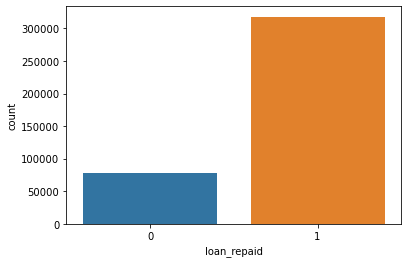

In [8]:
sns.countplot(x='loan_repaid', data=data)

**Data are totally imbalanced. Our DataSet contains much more people that fully paid their loans**

### Logistic Regression 
**We will implement a logist regresssion in our DataSet in order to predict if the person will pay given the  features in the other columns. Then our $X$ vector is all columns less the 'loan_repaid' column (the 'loan_repaid' column is our dependent variable $y$).**

In [9]:
X=data.drop('loan_repaid',axis=1)  
y=data['loan_repaid']

**1. Making a scalig of the data**

**Standardize features by removing the mean and scaling to unit variance**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()               #the instance of StanadardScaler
scaler.fit(X)                         

StandardScaler()

In [12]:
X=scaler.transform(X)

**2. The spliting in training and test sets**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.3)

**3. The training of de training set**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel=LogisticRegression(max_iter=400)  #Convergence is not reached until 300 iterations

In [17]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

**4. The predictions in the test set**

In [18]:
predictions=logmodel.predict(X_test)

**5. The performance**

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     23549
           1       0.88      1.00      0.93     95017

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



[[10678 12871]
 [  470 94547]]


### Conclusions

**confusion matrix interpretation**
$$\begin{pmatrix} 
& \text{total}  & 118566  & 11148 & 107418\\
\hline 
& &  & \text{predicted}& \text{condition} \\
&  &    & 0  & 1\\
\text{actual }   & \text{no paid} & 0 & 10678 & 12 871\\
\text{condition }& \text{paid}   & 1 & 470  & 94547
  \end{pmatrix}$$
  
**We predict 10678 people that didn't pay that actually didn't pay, but 12871 that didn't pay were predicted 
wrongly!!!**

**94547 were true 1 but 470 were predicted as they didn't pay and they did**

**The fact we are overpredicting false positives is a consequence of our highly imbalanced data (much more people that paid). The f1-score is then not as good as would like us** 


### An example

In [43]:
import random
random_ind = random.randint(0,len(data))

new_customer = data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           12000.00
term                   36.00
int_rate                8.39
installment           378.20
annual_inc          70000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   1.00
earliest_cr_year     2000.00
Name: 329797, Length: 77, dtype: float64

In [44]:
new_customer=new_customer.array.reshape(1,77)

In [45]:
new_customer=scaler.fit_transform(new_customer)

In [46]:
logmodel.predict(new_customer)   #predicted as 1

array([1])

In [47]:
data.iloc[random_ind]['loan_repaid'] #actually 0

0.0

In [59]:
random_ind_2 = random.randint(0,len(data))

new_customer_2 = data.drop('loan_repaid',axis=1).iloc[random_ind_2]

In [60]:
new_customer_2=new_customer_2.array.reshape(1,77)
new_customer_2=scaler.fit_transform(new_customer_2)

In [61]:
print(logmodel.predict(new_customer_2))
print('\t')
print(data.iloc[random_ind_2]['loan_repaid'])

[1]
	
1.0
